In [1]:
import pandas as pd
import os
from datetime import datetime as dt

In [2]:
path = "./data"
cols = ['started_at', 'start_station_id', 'ended_at', 'end_station_id', 'duration']

def file_concatinator(path):
    files = [file for file in os.listdir(path) if not (file.startswith('.') or file.startswith('w'))] # Ignore hidden file
    df = pd.DataFrame()
    for file in files:
        current_data = pd.read_csv(path+"/"+file, usecols = cols)
        df = pd.concat([df, current_data])
        #df2 = pd.concat([df, current_data[['started_at', 'start_station_id', ]]])
               
    return df

#df = pd.read_csv('./data/20-02.csv', usecols = ['started_at', 'start_station_id', 'ended_at', 'end_station_id'])
df = file_concatinator(path)
# save the data as csv file
df.to_csv('sykkle_data.csv')

# Q1: What is the average ride looks like?

In [2]:
# read the data again 
df = pd.read_csv('sykkle_data.csv')
df.head()

,Unnamed: 0,started_at,ended_at,duration,start_station_id,end_station_id
0,0,2020-08-01 00:04:12.542000+00:00,2020-08-01 00:08:33.462000+00:00,260,423,460
1,1,2020-08-01 01:54:23.528000+00:00,2020-08-01 02:01:20.350000+00:00,416,412,503
2,2,2020-08-01 03:00:08.082000+00:00,2020-08-01 03:10:36.755000+00:00,628,407,599
3,3,2020-08-01 03:00:19.792000+00:00,2020-08-01 03:05:55.369000+00:00,335,579,623
4,4,2020-08-01 03:00:40.721000+00:00,2020-08-01 03:13:23.463000+00:00,762,525,585


In [3]:
# Task 1: duration of rides for each month
df[['started_at', 'ended_at']] = df[['started_at', 'ended_at']].apply(pd.to_datetime)
df = df[df['started_at'] <= '2022-03-01 00:00:00']
df['month'] = df['started_at'].dt.month
df_m = df.groupby('month')['duration'].count().to_frame('tot_duration').reset_index().sort_values('month')
#df_m['tot_duration']= df_m['tot_duration']/3600
 
# Task 2: duration of rides for each year
df['year'] = df['started_at'].dt.year
df_year = df.groupby('year')['duration'].count().to_frame('tot_duration').reset_index().sort_values('year')
#df_year['tot_duration'] = df_year['tot_duration']/3600
#df_year

# Task 3: the duration for each month per year
df['year_month'] = df['started_at'].dt.to_period('M')
df_ym = df.groupby('year_month')['duration'].count().to_frame('tot_duration').reset_index().sort_values('year_month')
#df_ym['tot_duration'] = df_ym['tot_duration']/3600

# Task 4: The number of trip per each hour
df['hour'] = df['started_at'].dt.hour
df_hour = df.groupby('hour')['duration'].count().to_frame('tot_trip').reset_index().sort_values('hour')

/home/kassa/.local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [4]:
# Task 4: calculate the total duration for days
days_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
df['day'] = df['started_at'].dt.day_name()
df['day'] = pd.Categorical(df['day'], categories=days_order, ordered=True)

df_week = df.groupby('day')['duration'].sum().to_frame('tot_duration').reset_index()
df_week['tot_duration'] = df_week['tot_duration']/3600

days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
df_week["day"] = pd.Categorical(df_week.day, categories=days, ordered=True)
#from pandas.api.types import CategoricalDtype
#cat_type = CategoricalDtype(categories=cats, ordered=True)
#df_week['day'] = df_week['day'].astype(cat_type)
#df_week.head(10)

# Weather data ana

In [5]:
# Import data set and some pre-processing 
#-BEGIN HEADER-
#NASA/POWER CERES/MERRA2 Native Resolution Hourly Data 
#Dates (month/day/year): 01/04/2019 through 03/10/2022 
#Location: Latitude  59.9132   Longitude 10.7488 
#Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 258.74 meters
#The value for missing source data that cannot be computed or is outside of the sources #availability range: -999 
#Parameter(s): 
#T2M             MERRA-2 Temperature at 2 Meters (C) 
#T2MWET          MERRA-2 Wet Bulb Temperature at 2 Meters (C) 
#QV2M            MERRA-2 Specific Humidity at 2 Meters (g/kg) 
#PRECTOTCORR     MERRA-2 Precipitation Corrected (mm/hour) 
#WS10M           MERRA-2 Wind Speed at 10 Meters (m/s) 
#-END HEADER-

import pandas as pd
w_df = pd.read_csv('./data/weather_hour_2019.csv')
w_df.rename(columns={'YEAR':'Year', 'MO':'Month', 'DY':'Day', 'HR':'Hour'}, inplace=True)
w_df['date'] = pd.to_datetime(w_df[['Year', 'Month', 'Day', 'Hour']], format = '%Y/%M/%D %H')
w_df.drop(['Year', 'Month', 'Day', 'Hour'], axis=1, inplace=True)
#
w_df = w_df[(w_df['date'] > '2019-04-01 00:00:00') & (w_df['date'] < '2022-03-01 00:00:00')]
w_df = w_df[~w_df['date'].between('2020-01-01 00:00:00', '2020-03-01 00:00:00')]

w_df.head()

,T2M,T2MWET,specific_humidity,precipitation,WS10M,date
2089,-5.21,-6.09,2.26,0.0,1.92,2019-04-01 01:00:00
2090,-5.42,-6.34,2.20,0.0,1.80,2019-04-01 02:00:00
2091,-5.58,-6.51,2.14,0.0,1.69,2019-04-01 03:00:00
2092,-5.68,-6.63,2.14,0.0,1.61,2019-04-01 04:00:00
2093,-5.66,-6.67,2.08,0.0,1.65,2019-04-01 05:00:00


In [7]:
# Task 1: duration of rides for each month
#w_df[['started_at', 'ended_at']] = df[['started_at', 'ended_at']].apply(pd.to_datetime)
w_df['month'] = w_df['date'].dt.month
w_df_mT  = w_df.groupby('month')['T2M'].mean().to_frame('avg_temp').reset_index().sort_values('month')
w_df_mP  = w_df.groupby('month')['precipitation'].mean().to_frame('avg_precip').reset_index().sort_values('month')
w_df_mWS = w_df.groupby('month')['WS10M'].mean().to_frame('avg_windspeed').reset_index().sort_values('month')
w_df_mSH = w_df.groupby('month')['specific_humidity'].mean().to_frame('avg_humidity').reset_index().sort_values('month')
 
# Task 3: the duration for each month per year
w_df['year_month'], w_df['hour'] = w_df['date'].dt.to_period('M'), w_df['date'].dt.hour

w_df_ymT  = w_df.groupby('year_month')['T2M'].mean().to_frame('avg_temp').reset_index().sort_values('year_month')
w_df_ymP  = w_df.groupby('year_month')['precipitation'].mean().to_frame('avg_precip').reset_index().sort_values('year_month')
w_df_ymWS = w_df.groupby('year_month')['WS10M'].mean().to_frame('avg_windspeed').reset_index().sort_values('year_month')
#w_df_ymSH = w_df.groupby('year_month')['specific_humidity'].mean().to_frame('avg_humidity').reset_index().sort_values('year_month')

w_df_hourT  = w_df.groupby('hour')['T2M'].mean().to_frame('avg_temp').reset_index().sort_values('hour')
w_df_hourP  = w_df.groupby('hour')['precipitation'].mean().to_frame('avg_precip').reset_index().sort_values('hour')
w_df_hourWS = w_df.groupby('hour')['WS10M'].mean().to_frame('avg_windspeed').reset_index().sort_values('hour')

## Visialization for the first problem

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
weather_col = [w_df_mT.avg_temp, w_df_mP.avg_precip, w_df_mWS.avg_windspeed]
trip_duration = [df_m.tot_duration, df_m.tot_duration, df_m.tot_duration]
xlabel = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
keys = [xlabel, xlabel, xlabel]
title = ['trip duration vs temprature', 'trip duration vs precipitation', 'trip duration vs wind speed']
ylabel = ['Avg_temp [oC]', 'Avg_prec [mm]', 'Avg_windspeed [m/s]']
weather_ylabel= ['Temprature', 'Precipitation', 'Wind speed']
num = [12,12,12]

f, axs = plt.subplots(ncols=3, figsize=(18,5))
def plotting_func(axs, col, twin_col, keys, title, ylabel, num,  kind):
    for i in range(3):
        ax = axs[i]
        axtwin = ax.twinx()
        ax.set_xticks(range(num[i]))
        ax.set_xticklabels(keys[i], rotation = 90, size = 12, color='b')
        if kind == 'bar':
            ax.bar(range(num[i]), col[i], width=0.8, align='center', color = 'g')
        elif kind == 'line':
            ax.plot(range(num[i]), col[i], '-g')

            
        #ax.set_yticklabels(col[i], rotation =0, size = 12)
        axs[0].set_ylabel('# trips', color='g')
        ax.set_xlabel('Months', color='b')
        ax.tick_params(axis='y', colors='g')

        axtwin.plot(range(num[i]), twin_col[i], '-*k', linewidth=1.2)
        ax.set_title(title[i], fontsize = 12.0)
        #axt.set_xlabel(xlabel[i], fontsize = 12.0)
        axtwin.set_ylabel(ylabel[i], fontsize = 12.0) 
        f.tight_layout(pad=1.20)
#def y_fmt(tick_val, pos):
#    if tick_val > 1000000:
#        val = int(tick_val)/1000000
#        return '{:d} M'.format(val)
#    elif tick_val > 1000:
#        val = int(tick_val) / 1000
#        return '{:d} k'.format(val)
#    else:
#        return tick_val

        
plotting_func(axs, trip_duration, weather_col, keys, title, ylabel, num, 'bar')
#axis = plt.gca()
#axis.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

 

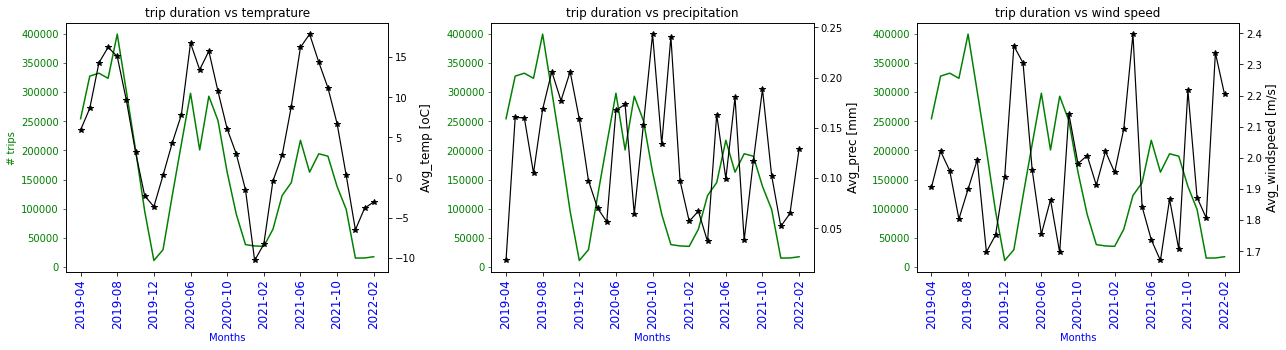

In [57]:
weather_col = [w_df_ymT.avg_temp, w_df_ymP.avg_precip, w_df_ymWS.avg_windspeed]
trip_duration = [df_ym.tot_duration, df_ym.tot_duration, df_ym.tot_duration]
#xlabel = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
keys = [df_ym.year_month, df_ym.year_month, df_ym.year_month]
title = ['trip duration vs temprature', 'trip duration vs precipitation', 'trip duration vs wind speed']
ylabel = ['Avg_temp [oC]', 'Avg_prec [mm]', 'Avg_windspeed [m/s]']
weather_ylabel= ['Temprature', 'Precipitation', 'Wind speed']
num = [len(df_ym.year_month), len(df_ym.year_month), len(df_ym.year_month)] 

f, axs = plt.subplots(ncols=3, figsize=(18,5))
plotting_func(axs, trip_duration, weather_col, keys, title, ylabel, num, 'line')
#axs[0].set_xticks(ax.get_xticks()[::2])
for i in range(3):
    axs[i].locator_params(axis='x', nbins=10)
    #axs[i].legend(loc=0)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/lib/python3/dist-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


<Figure size 864x360 with 0 Axes>

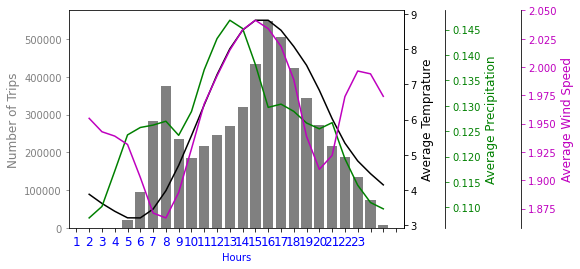

In [145]:
plt.figure(figsize=(12, 5))
f, ax = plt.subplots()
axt = ax.twinx()
axt1, axt2 = ax.twinx(), ax.twinx()

axt1.spines["right"].set_position(("axes", 1.125))
axt2.spines["right"].set_position(("axes", 1.35))

ax.bar(df_hour.hour, df_hour.tot_trip, color='grey')
ax.tick_params(axis='y', colors='grey')
ax.set_xlabel('Hours', color='b')
ax.set_xticklabels(df_hour.hour, size = 12, color='b')
ax.set_ylabel('Number of Trips', color='grey', size=12)
ax.locator_params(axis='x', nbins=48)

axt.plot(w_df_hourT.hour, w_df_hourT.avg_temp, 'k')
axt.tick_params(axis='y', colors='k')
axt.set_xticklabels(df_hour.hour, size = 12, color='k')
axt.set_ylabel('Average Temprature', color='k', size=12)


axt1.plot(w_df_hourP.hour, w_df_hourP.avg_precip, 'g')
axt1.tick_params(axis='y', colors='g')
axt1.set_xticklabels(df_hour.hour, size = 12, color='g')
axt1.set_ylabel('Average Precipitation', color='g', size = 12)


axt2.plot(w_df_hourWS.hour, w_df_hourWS.avg_windspeed, 'm')
axt2.tick_params(axis='y', colors='m')
axt2.set_xticklabels(df_hour.hour, size = 12, color='m')
axt2.set_ylabel('Average Wind Speed', color='m', size=12)


for ax in [axt, axt1, axt2]:
    ax.set_frame_on(True)
    ax.patch.set_visible(False)

    plt.setp(ax.spines.values(), visible=False)
    ax.spines["right"].set_visible(True)



# Q2: Which Station are most popular 

In [59]:
# Create a column that identifies before and after lunch

def get_time(x):
    if x < 12:
        return 'before lunch'
    else:
        return 'after lunch'

df['time'] = df['hour'].apply(get_time) #lambda x: 'before lunch' if x < 12 else 'after lunch')

pairings = list(zip(df.start_station_id, df.end_station_id))
df['pairs'] = pairings
#df['start_station_id'] = df['start_station_id'].astype('int')
df.head(2)

,Unnamed: 0,started_at,ended_at,duration,start_station_id,end_station_id,month,year,year_month,hour,day,time,pairs,n_trips
0,0,2020-08-01 00:04:12.542000+00:00,2020-08-01 00:08:33.462000+00:00,260,423,460,8,2020,2020-08,0,Saturday,before lunch,"(423, 460)",1
1,1,2020-08-01 01:54:23.528000+00:00,2020-08-01 02:01:20.350000+00:00,416,412,503,8,2020,2020-08,1,Saturday,before lunch,"(412, 503)",1


In [60]:
maxx = df[df['duration'] == df['duration'].max()]


<AxesSubplot:xlabel='day', ylabel='count'>

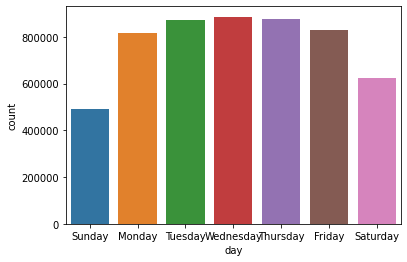

In [16]:
import seaborn as sns
sns.countplot(x='day', data=df)

In [61]:
df_bl = df[df['time'] == 'before lunch'] # get the top ten start-return trips in the morning 
df_al = df[df['time'] == 'after lunch'] # get the top ten start-return trips in the afternon 
 
df_bl = df_bl.groupby('pairs')['duration'].count().to_frame('n_trips').reset_index().sort_values('n_trips', ascending=False)
df_bl = df_bl.iloc[0:20, :]

df_al = df_al.groupby('pairs')['duration'].count().to_frame('n_trips').reset_index().sort_values('n_trips', ascending=False)
df_al = df_al.iloc[0:20, :]

# df_pair = df.groupby('pairs')['duration'].count().to_frame('n_trips').reset_index().sort_values('n_trips', ascending=False)

#df_pair = df_pair.iloc[0:10, :]
#df_pair
df_bl.head()

,pairs,n_trips
18821,"(456, 479)",2251
20702,"(464, 443)",2079
18859,"(456, 534)",2048
15195,"(440, 495)",1985
16776,"(447, 443)",1607


- Task: Number of trips initiated before and after lunch 

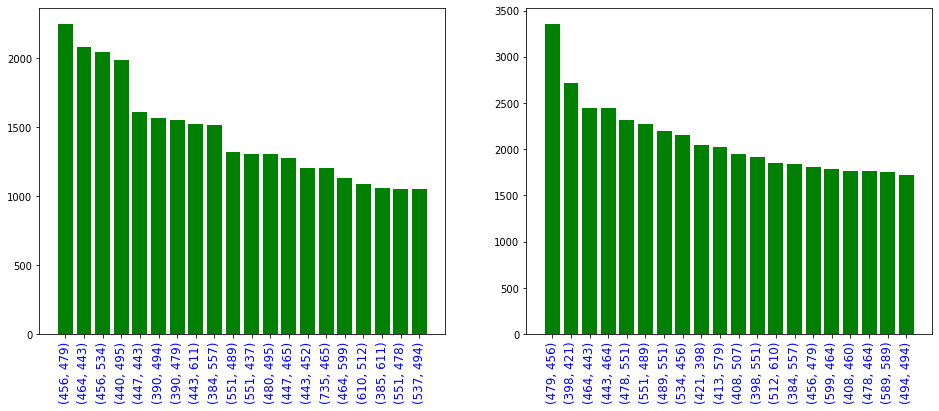

In [75]:
bl = [str(key) for key in df_bl.pairs]

f, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].bar(range(len(bl)), df_bl.n_trips, tick_label=bl, color='g')
ax[0].set_xticks(range(len(bl)))
ax[0].set_xticklabels(bl, rotation = 90, size = 12, color='b')
al = [str(key) for key in df_al.pairs]

ax[1].bar(range(len(al)), df_al.n_trips, tick_label = al, color= 'g')
ax[1].set_xticks(range(len(al)))
ax[1].set_xticklabels(al, rotation=90, size = 12, color = 'b')
#plt.xticks(rotation='vertical', size=8)
plt.show()

In [64]:
# Task 1: Top ten stations
df_startstation = df.groupby('start_station_id')['duration'].count().to_frame('n_start_trips').reset_index().sort_values('start_station_id', ascending = True)
df_endstation = df.groupby('end_station_id')['duration'].count().to_frame('n_end_trips').reset_index()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


start_station_id      2268
n_start_trips       148760
dtype: int64

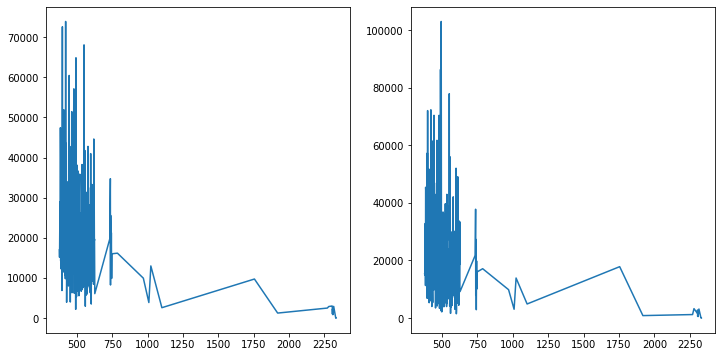

In [65]:
f, ax = plt.subplots(ncols=2, figsize=(12, 6))
ax[0].plot(df_startstation.start_station_id, df_startstation.n_start_trips)
ax[1].plot(df_endstation.end_station_id, df_endstation.n_end_trips)

sum1 = df_startstation[df['start_station_id'] <= 750].sum(axis=0)
sum2 = df_startstation[df['start_station_id'] > 750].sum(axis=0)
sum2
#df_startstation.start_station_id